## Homework 8

## <em> Interpolation, Resampling Methods, and Gaussian Processes</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

### Imports

In [ ]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***

#### Problem 1 - Supernova revisited

In this homework, we use a compilation of supernovae data to show that the expansion of the universe is accelerating, and hence it contains dark energy. This is the Nobel prize winning research in 2011 (https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/), and Saul Perlmutter, a professor of physics at Berkeley, shared a prize in 2011 for this discovery.
<br><br>
"The expansion history of the universe can be determined quite easily, using as a “standard candle” any distinguishable class of astronomical objects of known intrinsic brightness that can be identified over a wide distance range. As the light from such beacons travels to Earth through an expanding universe, the cosmic expansion stretches not only the distances between galaxy clusters, but also the very wavelengths of the photons en route. By the time the light reaches us, the spectral wavelength $\lambda$ has thus been redshifted by precisely the same incremental factor $z = \Delta \lambda/\lambda$ by which the cosmos has been stretched in the time interval since the light left its source. The recorded redshift and brightness of each such object thus provide a measurement of the total integrated expansion of the universe since the time the light was emitted. A collection of such measurements, over a sufficient range of distances, would yield an entire historical record of the universe’s expansion." (Saul Perlmutter, http://supernova.lbl.gov/PhysicsTodayArticle.pdf).
<br><br>
Supernovae emerge as extremely promising candidates for measuring the cosmic expansion. Type I Supernovae arises from the collapse of white dwarf stars when the Chandrasekhar limit is reached. Such nuclear chain reaction occurs in the same way and at the same mass, the brightness of these supernovae are always the same. The relationship between the apparent brightness and distance of supernovae depend on the contents and curvature of the universe.
<br><br>
We can infer the "luminosity distance" $D_L$ from measuring the inferred brightness of a supernova of luminosity $L$. Assuming a naive Euclidean approach, if the supernova is observed to have flux $F$, then the area over which the flux is distributed is a sphere radius $D_L$, and hence <br><br>
$$F = \frac{L}{4\pi D_L^2}.$$
<br>
In Big Bang cosmology, $D_L$ is given by:
<br><br>
$$ D_L = \frac{\chi(a)}{a} $$
<br>
where $a$ is the scale factor ($\frac{\lambda_0}{\lambda} = 1 + z = \frac{a_0}{a}$, and the quantity with the subscript 0 means the value at present. Note that $a_0 = 1, z_0 = 0$.), and $\chi$ is the comoving distance, the distance between two objects as would be measured instantaneously today. For a photon, $cdt = a(t)d\chi$, so $\chi(t) = c\int_t^{t_0} \frac{dt'}{a(t')}$. We can write this in terms of a Hubble factor ($H(t) = \frac{1}{a}\frac{da}{dt}$), which tells you the expansion rate: $\chi(a) = c\int_a^1 \frac{da'}{a'^2H(a')} = c\int_0^z \frac{dz'}{H(z')}$. (change of variable using $a = \frac{1}{1+z}$.)
<br><br>
Using the Friedmann equation (which basically solves Einstein's equations for a homogenous and isotropic universe), we can write $H^2$ in terms of the mass density $\rho$ of the components in the universe: $H^2(z) = H_0^2[\Omega_m(1+z)^3 + (1-\Omega_m)(1+z)^2].$ <br><br>
$\Omega$ is the density parameter; it is the ratio of the observed density of matter and energy in the universe ($\rho$) to the critical density $\rho_c$ at which the universe would halt is expansion. So $\Omega_0$ (again, the subscript 0 means the value at the present) is the total mass and energy density of the universe today, and consequently $\Omega_0 = \Omega_{m}$ (matter density parameter today; remember we obtained the best-fit value of this parameter in Project 1?) = $\Omega_{\mathrm{baryonoic\ matter}}$ + $\Omega_{\mathrm{dark\ matter}}$. If $\Omega_0 < 1$, the universe will continue to expand forever. If $\Omega_0 > 1$, the expansion will stop eventually and the universe will start to recollapse. If $\Omega_0 = 1$, then the universe is flat and contains enough matter to halt the expansion but not enough to recollapse it. So it will continue expanding, but gradually slowing down all the time, finally running out of steam only in the infinite future. Even including dark matter in this calculation, cosmologists found that all the matters in the universe only amounts to about a quarter of the required critical mass, suggesting a continuously expanding universe with deceleration. Then, using all this, we can write the luminosity distance in terms of the density parameters: <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.
<br><br>
Fluxes can be expressed in magnitudes $m$, where $m = -2.5\cdot\mathrm{log}_{10}F$ + const. The distance modulus is $\mu = m - M$ ($M$ is the absolute magnitude, the value of $m$ if the supernova is at a distance 10pc. Then, we have:
<br><br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}\Big(D_L\ [in\ the\ unit\ of \ Mpc]\Big)$$
<br><br>
In this assignment, we use the SCP Union2.1 Supernova (SN) Ia compilation. (http://supernova.lbl.gov/union/)
<br><br>
First, load the measured data: $z$ (redshift), $\mu$ (distance modulus), $\sigma(\mu)$ (error on distance modulus)


In [ ]:
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW8/sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

***

With measurements of the distance modulus $\mu$, we used Bayesian analysis to estimate the cosmological parameters $w$ and $\Omega_m$.
<br><br>
Let us assume that the universe is flat (which is a fair assumption since the CMB measurements indicate that the universe has no large-scale curvature). $\Omega_0 = \Omega_m + \Omega_{DE} = 1$. Then, we do not need to worry about the curvature term:<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.<br><br>
Assuming that errors are Gaussian (can be justified by averaging over large numbers of SN; central limit theorem), we calculate the likelihood $L$ as: <br><br>
$$ L \propto \mathrm{exp}\Big( -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) $$
<br>
where $z_i, \mu_i, \sigma(\mu_i)$ are from the measurements, and we compute $\mu_{model}$ as a function of $z, \Omega_m, w$.



***

In this problem, assume that the universe is flat, and $w = -1$ (dark energy is $\Lambda$.) We call this flat $\Lambda$CDM cosmology. By fixing $h$ and $w$, $D_L = D_L(z, \Omega_m)$.
<br><br>
First, I precalculated $D_L$ for $h = 0.7$ from 2 one-dimensional vectors giving the tabulated values of the parameters $z$ and $\Omega_m$ in the range $0.01 < z < 1.5$ and $0.01 < \Omega_m < 1$. We call the tabulated values of $z$ and $\Omega_m$ as "z_fit" (length 200) and "Om0_fit" (length 100). Then, "DL_fit" is a 2-dimensional grid of tabulated values of $D_L$ (its dimension 200 $\times$ 100. i.e. $D_L$[i,j] is $D_L$$\big($$z$ = z_fit[i], $\Omega_m$ = Om0_fit[j]$\big)$
<br><br>
Now using a 2-D spline interpolation, estimate $D_L(z, \Omega_m)$ for any $z$ and $\Omega_m$.
<br><br>
<span style="color:blue"> <i> 1. Using scipy.interpolate.RectBivariateSpline, estimate $D_L(z, \Omega_m)$ for any $z$ and $\Omega_m$. Plot $\mu = 25 + 5\cdot \mathrm{log}_{10}(D_L(z, \Omega_m = 0.3))$ as a function of $z$ on top of the measured data. How does it fit to the data? </i></span>
<br><br>
(Hint: Let z_spline = RectBivariateSpline(x_fit,y_fit,z_fit). Then, z_spline.ev(x,y) will evaulate the spline at given positions x and y.)

In [ ]:
DL_fit = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW8/DL_fit.txt").T
Om0_fit = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW8/Om0_fit.txt")
z_fit = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW8/z_fit.txt")

In [ ]:
from scipy.interpolate import RectBivariateSpline

In [ ]:
...

In [ ]:
plt.figure(figsize = (20,14))

...

plt.legend()
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

<br><br>
Now, run emcee to estimate $\Omega_m$. 

You calculated $\mu$ from the $\Lambda$CDM model given $z$ and $\Omega_m$, using $D_L$ from the 2D spline interpolation. Using this result, define a function $\mu_{model}$ which outputs $\mu$ from the $\Lambda$CDM theory model given $z$ and $\Omega_m$. Then, Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam), and the log-likelihood is 
<br><br>
$$ \mathrm{ln}(L) \approx -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m)]^2}{\sigma(\mu_i)^2} = -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{Dmu_i^2}{\sigma(\mu_i)^2} $$

<span style="color:blue"> <i> 2. Define a function for mu_model (mu predicted from theory) and lnL (log-likelihood). Then, (1) Run few parallel sequences of Metropolis algorithm simulations using the package "emcee". (2) Print your constraints on $\Omega_m$. (3) Plot 1-d posterior of $\Omega_m$. Make sure that your chains have converged.</i></span>
<br>

In [ ]:
...

***

Finally, we use a <b>Boostrap</b> resampling method to estimate the posterior of $\Omega_m$ and $w$.
<br><br>
Suppose that we have 10 measurements of $x$: [3.7, 3.2, 3.3, 3.1, 3.2, 3.5, 2.9, 3.4, 3.0, 3.1]. Now, randomly take 5 samples of 10 data measurements "with replacement."

In [3]:
x = np.array([3.7, 3.2, 3.3, 3.1, 3.2, 3.5, 2.9, 3.4, 3.0, 3.1])

num_samples = 5
len_x = len(x)
idx = np.random.randint(0, len_x, (num_samples, len_x))
print("After bootstrap re-sampling")
print(x[idx])

After bootstrap re-sampling
[[ 2.9  3.1  3.   3.   3.2  3.1  3.3  3.5  3.4  2.9]
 [ 3.4  3.3  3.   3.2  3.1  3.1  3.5  3.1  3.1  3.4]
 [ 3.2  3.2  3.2  3.2  3.7  3.1  3.2  3.2  3.3  3. ]
 [ 2.9  2.9  2.9  3.2  3.   3.2  3.5  3.1  3.7  3.5]
 [ 3.2  2.9  3.2  3.2  3.3  3.3  3.2  3.2  3.4  3.7]]


Say you wish to see the probability distribution of $\bar{x}$. Then, take 100 samples using bootstrap and plot the histogram of $\bar{x}$.


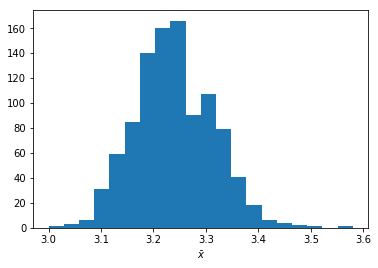

In [4]:
num_samples = 1000
len_x = len(x)
idx = np.random.randint(0, len_x, (num_samples, len_x))
x_bar = np.mean(x[idx], axis = 1)
plt.hist(x_bar,bins=20)
plt.xlabel(r'$\bar{x}$')
plt.show()


<br><br>
<span style="color:blue"> <i> 3. Use a bootstrap resampling technique to estimate the posteriors of $\Omega_m$ and $w$. Plot their 1-d posteriors (histograms). Take 200 bootstrap samples (or more - obviously you will get a better estimate with a greater number of samples) of supernova distance modulus measurements. </i></span><br>

In [ ]:
...

***

#### Problem 2 - Back to Quasar (Continued from HW6 - Problem 2 - Part 7)



In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
wavelength = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW8/HW5_Problem2_wavelength_300.txt")
X = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW8/HW5_Problem2_QSOspectra_300.txt")
ivar = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW8/HW5_Problem2_ivar_flux_300.txt")

<br><br>
The following analysis is based on https://arxiv.org/pdf/1605.04460.pdf.
<br><br>
In HW6, we reconstruct the QSO spectra from the noisy data. This reconstructed spectra is closer to the true spectra of QSO. Note that in reality, the true spectra can never be directly observed, both due to measurement error and due to absorption by intervening matter along the line of sight. So we wish to perform inference about the true spectra of QSO using a non-parametric technique called <b>Gaussian processes (GP)</b>. We henceforth call the measured spectra as $y(\lambda)$ and the true spectra as $f(\lambda)$ (where $\lambda$ refers to wavelength).
<br><br>
A gaussian process is fully specified by its first two central moments: a mean function $\mu(\lambda)$ and a covariance function $K(\lambda, \lambda')$: <br><br>
$$ \mu(\lambda) = \mathbb{E}[f(\lambda)\ \vert\ \lambda] $$<br>
$$ K(\lambda, \lambda') = \mathrm{cov}[f(\lambda), f(\lambda')\ \vert\ \lambda, \lambda'] $$.
<br>
In this problem, we can derive the posterior distribution of $f$ conditioned on the observed values of $y$: <br><br>
$$ p(f^*\ \vert\ \lambda^*, \lambda, y, \sigma(\lambda)^2) = \mathcal{N}(f^*\ \vert\ \mu_{f|y}(\lambda^*), K_{f|y}(\lambda^*, \lambda^{*,})) $$
<br>
where $\mathcal{N}(f\ \vert\ \mu, K)$ is a multivariate Gaussian given by: <br>
$$ \mathcal{N}(f\ \vert\ \mu, K) = \frac{1}{\sqrt{(2\pi)^d \mathrm{det}K}} \mathrm{exp}\big(-\frac{1}{2}(f-\mu)^TK^{-1}(f-\mu)\big) $$<br>
where $d$ is the dimension of $f$.
<br><br><br><br>
In other words, for the QSO $i$, the measured spectra $y$ is $X_{row\ i}$. Then, we can compute the posterior distribution of $f$ given $X_{row\ i}$ as:
<br><br>
$$ \mu + \mathcal{N}\big(f\ \big\vert\ \mu_{f|X_{row\ i}}, K_{f|X_{row\ i}}\big) $$
<br>
where $\mu$ is given by:
<br><br>
$ \mu$ $ =
    \begin{bmatrix}
        \overline{x}_1 & \overline{x}_2 & \dots  &  \overline{x}_{824} \\
    \end{bmatrix}.$
<br><br>
The mean function $\mu_{f|X_{row\ i}}$ and the covariance function $K_{f|X_{row\ i}}$ are defined as:<br><br>
$$ \mu_{f|X_{row\ i}} = \mu\ +\ K(K + V)^{-1}(X_{row\ i} - \mu)  $$<br>
$$ K_{f|X_{row\ i}} = K - K(K + V)^{-1}K$$
<br>
where $K = \phi \phi^T$ (We can use $\phi$ from Part 7, Problem 2, HW6. $\phi$ is a matrix of eigenvectors, its dimension is "nLambda" x "nEigvec"). <br><br>$V$ is a diagonal matrix whose entries are $\sigma(\lambda)^2$ e.g. for the QSO $i$, $V$ = np.diag(1/ivar[i,:]).
<br><br>
Finally, we can plot $f(\lambda)$ by sampling from $\mathcal{N}\big(f\ \big\vert\ \mu_{f|X_{row\ i}}, K_{f|X_{row\ i}}\big)$.
<br><br>
<span style="color:blue"> <i> 1. For any two spectra, plot $f(\lambda)$ using Gaussian processes. You can use np.random.multivariate_normal (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.multivariate_normal.html) to sample from a multivariate Gaussian. Plot the original spectra in the same figure for comparison. </i></span> <br>

In [ ]:
...